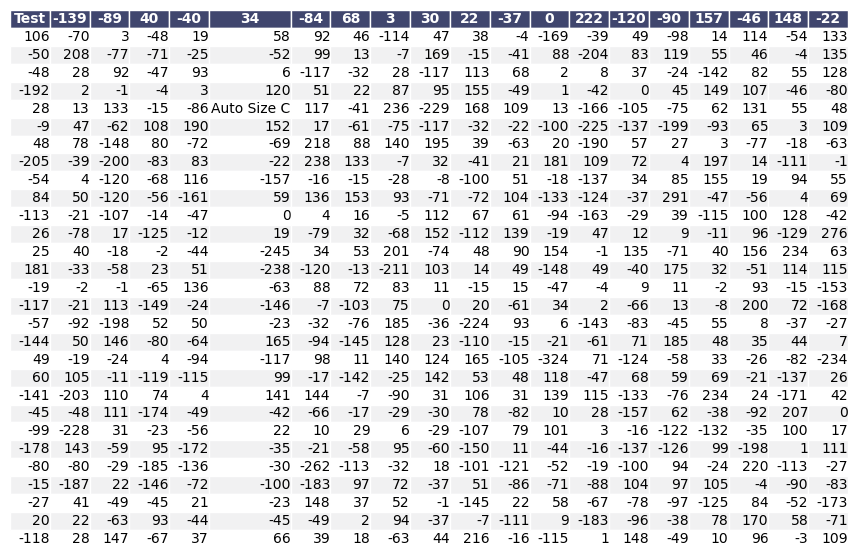

spent time 2019ms


In [6]:
import time

import matplotlib.pyplot as plt
import numpy as np
import six
from PIL import ImageFont
from numpy.random import randn


# noinspection PyPep8Naming
def plt_figure_by_pixel(num=None,  # autoincrement if None, else integer from 1-N
                        figsize=(480, 320),  # defaults to rc figure.figsize
                        dpi=None,  # defaults to rc figure.dpi
                        facecolor=None,  # defaults to rc figure.facecolor
                        edgecolor=None,  # defaults to rc figure.edgecolor
                        frameon=True,
                        FigureClass=plt.Figure,
                        clear=False,
                        **kwargs):
    """
    Create figure by pixel
    """
    if dpi is None:
        dpi = plt.rcParams['figure.dpi']
    figsize = (figsize[0] / dpi, figsize[1] / dpi)
    fig = plt.figure(
        num=num,
        figsize=figsize,
        dpi=dpi,
        facecolor=facecolor,
        edgecolor=edgecolor,
        frameon=frameon,
        FigureClass=FigureClass,
        clear=clear,
        **kwargs)
    return fig


def plt_get_text_width_pixel(text, fontsize=None):
    if fontsize is None:
        fontsize = plt.rcParams['font.size']

    font_name = plt.rcParams['font.sans-serif'][0]
    # font = ImageFont.truetype(font_name, size=int(fontsize))
    font = ImageFont.load_default()
    w = font.getlength(str(text))
    return w


def plt_get_text_height_pixel(fontsize=None):
    if fontsize is None:
        fontsize = plt.rcParams['font.size']
    return fontsize


def plt_get_size_by_pixel(dpi=None):
    """
    get figure size by pixel
    """
    if dpi is None:
        dpi = plt.gcf().dpi

    fig = plt.gcf()
    w = fig.get_figwidth() * dpi
    h = fig.get_figheight() * dpi
    return w, h


def plt_set_margin_by_pixel(top=None, bottom=None, left=None, right=8, fontsize=None, dpi=None):
    """
    set figure margin by pixel
    """
    if dpi is None:
        dpi = plt.rcParams['figure.dpi']
    if fontsize is None:
        fontsize = plt.rcParams['font.size']

    text_size = (fontsize / dpi) * 108
    if top is None:
        title = plt.gca().get_title()
        top = 0 if title is None or title == '' else (fontsize + 8 + 4)
    if bottom is None:
        bottom = text_size + 4 + 4
    if left is None:
        left = text_size + 4 + 4

    w, h = plt_get_size_by_pixel()

    top = 1 - top / h
    bottom = bottom / h
    left = left / w
    right = 1 - right / w

    plt.subplots_adjust(top=top, bottom=bottom, left=left, right=right)


def plot_table(data,
               title=None,
               col_widths=None,
               fontsize=None,
               header_colors=None,
               no_header=False,
               row_colors=None,
               edge_color='w',
               ax=None,
               **kwargs):
    if fontsize is None:
        fontsize = plt.rcParams['font.size']

    # 行列数
    r = len(data)

    row_height = plt_get_text_height_pixel(fontsize) * (1 if r > 2 else 2) + 4 + 4

    if col_widths is None:
        col_widths = get_data_columns_max_width(data, fontsize)

    if ax is None:
        size = (sum(col_widths), row_height * r)
        plt_figure_by_pixel(figsize=size)
        ax = plt.gca()
        ax.axis('off')
    else:
        ax.axis('off')

    top = 0
    if title is not None and title != '':
        title, color = (title, None) if type(title) is str else (title[0], title[1])
        plt.title(title, ax=ax, color=color, fontsize=fontsize + 2)
        top = plt_get_text_height_pixel(fontsize + 2) + 4 + 4

    table = ax.table(cellText=data[1:], colWidths=col_widths, bbox=[0, 0, 1, 1], colLabels=data[0], **kwargs)

    table.auto_set_font_size(False)
    table.set_fontsize(fontsize)

    set_table_cell_default_style(table,
                                 header_colors=header_colors, no_header=no_header,
                                 row_colors=row_colors, edge_color=edge_color)

    plt_set_margin_by_pixel(top=top, bottom=2, left=2, right=2)

    return ax, table, col_widths


# noinspection PyProtectedMember
def set_table_cell_default_style(table, header_colors=None, no_header=False, row_colors=None, edge_color='w'):
    if header_colors is None:
        header_colors = ['#40466e', 'w']
    if type(header_colors) is str:
        header_colors = [header_colors, 'w']

    if row_colors is None:
        row_colors = ['#f1f1f2', 'w']
    if type(row_colors) is str:
        row_colors = [row_colors, 'w']

    for k, cell in six.iteritems(table._cells):
        r, c = k
        cell.set_edgecolor(edge_color)
        if r == 0 and not no_header:
            cell.set_text_props(weight='bold', color=header_colors[1])
            cell.set_facecolor(header_colors[0])
        else:
            cell.set_facecolor(row_colors[r % len(row_colors)])
        cell._loc = 'center'
        cell.PAD = 0

def get_data_columns_max_width(data, fontsize):
    """
    get columns max width
    """
    if type(data) is not np.ndarray:
        data = np.array(data)

    a = []
    for cols in data.T:
        m = max([plt_get_text_width_pixel(x, fontsize) for x in cols])
        a.append(8 + m + 8)
    return a


def test():
    data = (np.random.randn(30 * 20).reshape([-1, 20]) * 100).astype(int).astype(str)
    data[0][0] = 'Test'
    data[5][5] = 'Auto Size Column'
    time_start = time.time()
    plot_table(data)
    plt.show()
    time_spent = time.time() - time_start
    print('spent time', str(int(time_spent * 1000)) + 'ms')

test()